In [70]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib inline
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

In [71]:
# load foF2
data=np.loadtxt('AVD1976dayli_KLD.dat')
time=data[:,0]
foF2=data[:,1]

ntime=len(time)

In [72]:
""""
# test fo fft
time=np.arange(64)
ntime=len(time)
foF2=4.*np.sin(2.*np.pi/6.*time)
#y=sin(2.*pi/24.*t)
"""

'"\n# test fo fft\ntime=np.arange(64)\nntime=len(time)\nfoF2=4.*np.sin(2.*np.pi/6.*time)\n#y=sin(2.*pi/24.*t)\n'

In [73]:
# window size in day
w_size=36
dx=1.
# number of points in windows
w_num=int(w_size/dx)
# number of  
w_frec=len(time)-1

In [74]:
#T = 2.
#k=np.arange(ntime)
#frq=k/T
#frq = frq[(range(int(ntime/2)))]
#print(frq)
# Функция, которая расчитывает значения частот от минимальной до максимально возможной
# задаем количество частот и шаг по частоте=частоте Котельникова
#frq=np.zeros(int(ntime/2+1))
freq=np.fft.fftfreq(ntime, d=1.0)

#frq[:]=freq[0:int(ntime/2)+1]
#print(freq[0:int(ntime/2)+1])
#Убедимся, что частоты расчитываются по правилу 1.*d/N, 2*d/N ... (N/2-1)*d/N
frq=np.arange(1,ntime/2.)/ntime
#print (np.arange(1,ntime/2.)/ntime)

Text(0, 0.5, '|Y(freq)|')

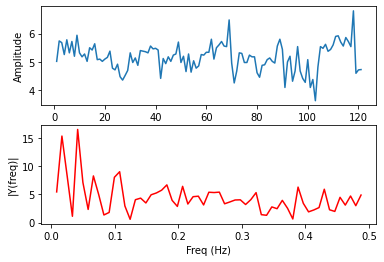

In [75]:
fof2mean=np.mean(foF2)
Y = np.fft.fft(foF2)# fft computing and normalization
Y = Y[range(int(ntime/2.))]
fig, ax = plt.subplots(2, 1)
ax[0].plot(time,foF2)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(freq[1:int(ntime/2)],abs(Y[1:int(ntime/2)]),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

(0.0, 120.0)

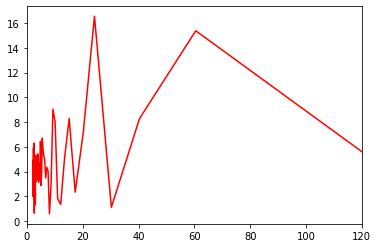

In [76]:
per=np.zeros(int(ntime/2))
per[1:int(ntime/2)]=1./freq[1:int(ntime/2)]
plt.plot(per[1:int(ntime/2)],abs(Y[1:int(ntime/2)]),'r')
plt.xlim([0,120])

In [77]:
# возможны пропуски в данных
bord=[]
i_st_end=np.zeros(2).astype(int)
jstart=0
jend=0
# search windows
for i in range(0,ntime-w_num-1): # цикл по всем точкам xt
   
    ix_start=i
    ix_end=i+w_num
    x_s=time[ix_start]
    x_e=time[ix_end]
    #print(i,x_s,x_e)
    #print(i_st_end)
    while(x_s > time[jstart]):
        jstart=jstart+1
        jend=jstart
        #print(jstart)
    while (x_e > time[jend]):
        jend=jend+1
        if(jend>w_frec):
            jend=w_frec
            break
    bord.append([jstart,jend])         

In [78]:
# massive of spectrogramm

w_spectr=len(bord)

win_fraq_min=1./w_size
win_fraq_max=1./(2.*dx)

i_df=int((win_fraq_max-win_fraq_min)/win_fraq_min)+1
#freq=np.arange(win_fraq_min,win_fraq_max,win_fraq_min)
freq_w=np.fft.fftfreq(w_size, d=1.0)
i_df=int(len(freq_w)/2)
#print(i_df,freq,len(bord))
m_LS=np.zeros(i_df*w_spectr).reshape(i_df,w_spectr)
print (np.shape(m_LS),i_df,freq_w)   
# window FFT transform

i=0
for gran in bord:
    i_st=gran[0]
    i_en=gran[1]
    foF2mean=np.mean(foF2[i_st:i_en])
    #m_LS[0:i_df,i]=signal.lombscargle(time[i_st:i_en], foF2[i_st:i_en]-foF2mean, freq,normalize=True)
    Y = np.fft.fft(foF2[i_st:i_en])# fft computing and normalization
    m_LS[0:i_df,i] = abs(Y[0:int(w_size/2)])/np.mean(abs(Y[0:int(w_size/2)]))
    i=i+1
    
#print (np.shape(m_LS),i_df,freq_w,i)         
        

(18, 84) 18 [ 0.          0.02777778  0.05555556  0.08333333  0.11111111  0.13888889
  0.16666667  0.19444444  0.22222222  0.25        0.27777778  0.30555556
  0.33333333  0.36111111  0.38888889  0.41666667  0.44444444  0.47222222
 -0.5        -0.47222222 -0.44444444 -0.41666667 -0.38888889 -0.36111111
 -0.33333333 -0.30555556 -0.27777778 -0.25       -0.22222222 -0.19444444
 -0.16666667 -0.13888889 -0.11111111 -0.08333333 -0.05555556 -0.02777778]


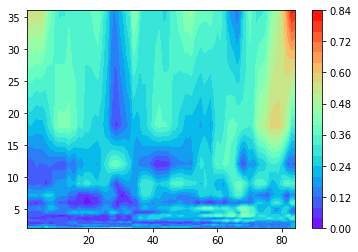

In [79]:
plt.contourf(time[:-w_num-1],1./freq_w[1:int(w_size/2)],m_LS[1:,:],levels=24,cmap=cm.rainbow)

plt.colorbar()
plt.savefig("FFT_win_"+str(w_size).format("6.2f")+".png")

In [80]:
print (1./freq_w[1:int(w_size/2)])
#plt.plot(1./freq,abs(Y[range(int(ntime/2))]),'r')

[36.         18.         12.          9.          7.2         6.
  5.14285714  4.5         4.          3.6         3.27272727  3.
  2.76923077  2.57142857  2.4         2.25        2.11764706]
